<a href="https://colab.research.google.com/github/CarnielGael/2023_CENTURI-SummerSchool/blob/main/Dataset1_Carniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(143,)


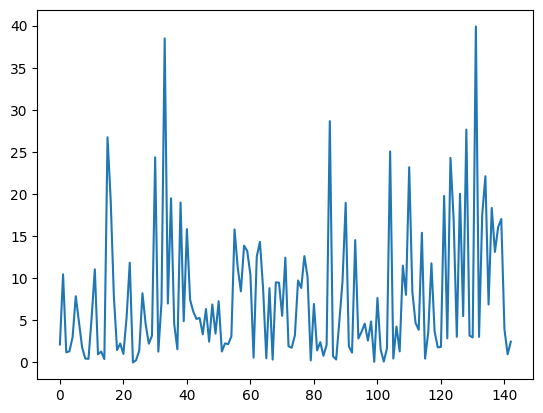

In [9]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('Dataset1.mat')


mat.keys()
directions =mat["direction"]
neurons = mat["R"]

neurons.shape

np.mean(neurons)#mean of the whole tab

means = (neurons.mean(axis=1))

print(means.shape)
plt.plot(means)

In [10]:
#vect = []
#for i in pd.Series(range(1,9)):
#  if directions == i :
#    np.concatenate(vect,)

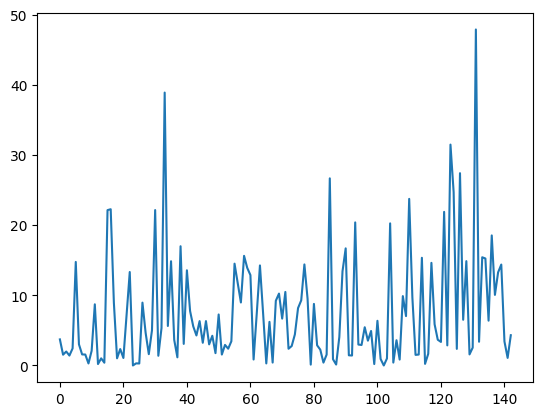

In [11]:
index = []
for i in range(1,158):
  if directions[i]==1:
    index.append(i)

tabdirection1 = neurons[:,index]# [index]]

plt.plot(tabdirection1.mean(axis=1))




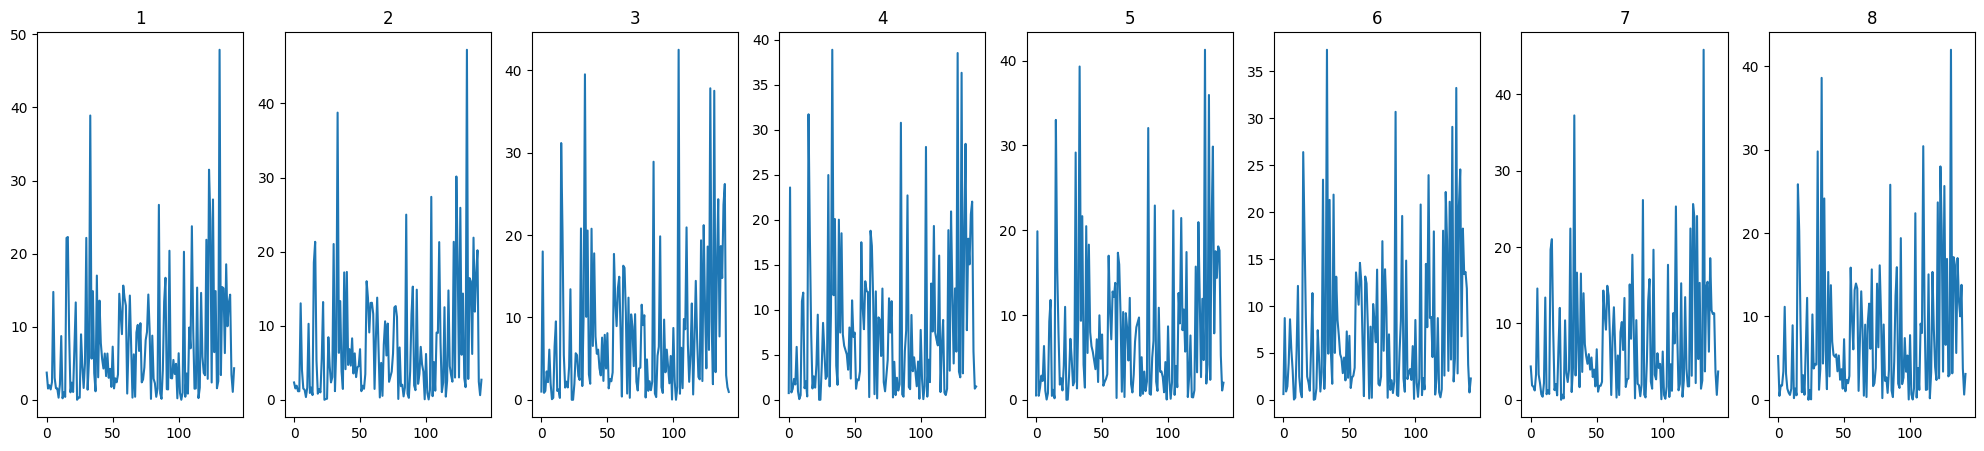

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=8,figsize=(25,5))
c=0

for d in range(1,9):
    index = []
    for i in range(1,158):
      if directions[i]==d:
        index.append(i)

    tabdirection1 = neurons[:,index]# [index]]
    ax[d-1].plot(tabdirection1.mean(axis=1))
    ax[d-1].set_title(d)


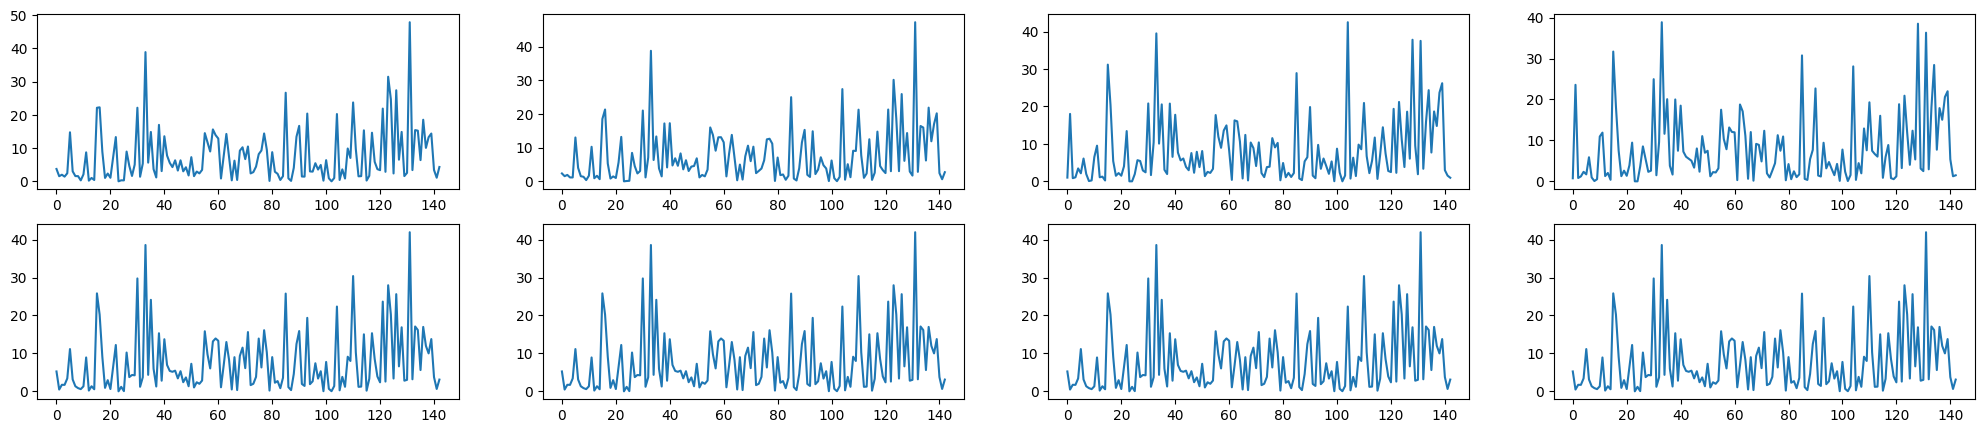

In [13]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(25,5))
c=0
stackdirection = []
for d in range(1,9):

    index = []
    for i in range(1,158):
      if directions[i]==d:
        index.append(i)

    tabdirection = neurons[:,index]# [index]]
    stackdirection.append(tabdirection)

    if d>4 :
      c = 1
      ax[c][d-5].plot(tabdirection1.mean(axis=1))
    else:
      ax[c][d-1].plot(tabdirection.mean(axis=1))



In [14]:
nrows = 18; ncols=8
#nrows=4;ncols=7
erreur_standard = 0 #Better with 0
fromneurone = 0
plot = 0

if plot==1:
  fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(4*ncols,nrows*3))

neru=[]
for i in range(0+fromneurone,min(fromneurone+nrows*ncols,neurons.shape[0])):#range(0,neurons.shape[O]):
  y=[]
  std_dev=[]

  for d in range(0,8):
    #neuron = stackdirection[1,d]
    y.append(stackdirection[d][i].mean())
    if(erreur_standard==1):
      std_dev.append(np.std(stackdirection[d][i])/len(stackdirection[d][i]))
    else:
      std_dev.append(np.std(stackdirection[d][i]))

  y = np.array(y)

  if(min(std_dev+y)<max(y-std_dev)):
    neru.append(i)
  if plot==1:
      plt.title(i)
      ax[(i-fromneurone)//ncols][(i-fromneurone)%ncols].plot(range(1,9),y)
      ax[(i-fromneurone)//ncols][(i-fromneurone)%ncols].set_title(i+1)
      ax[(i-fromneurone)//ncols][(i-fromneurone)%ncols].fill_between(range(1,9), y - std_dev, y + std_dev, alpha=0.3)

if plot==1:
  fig.tight_layout()




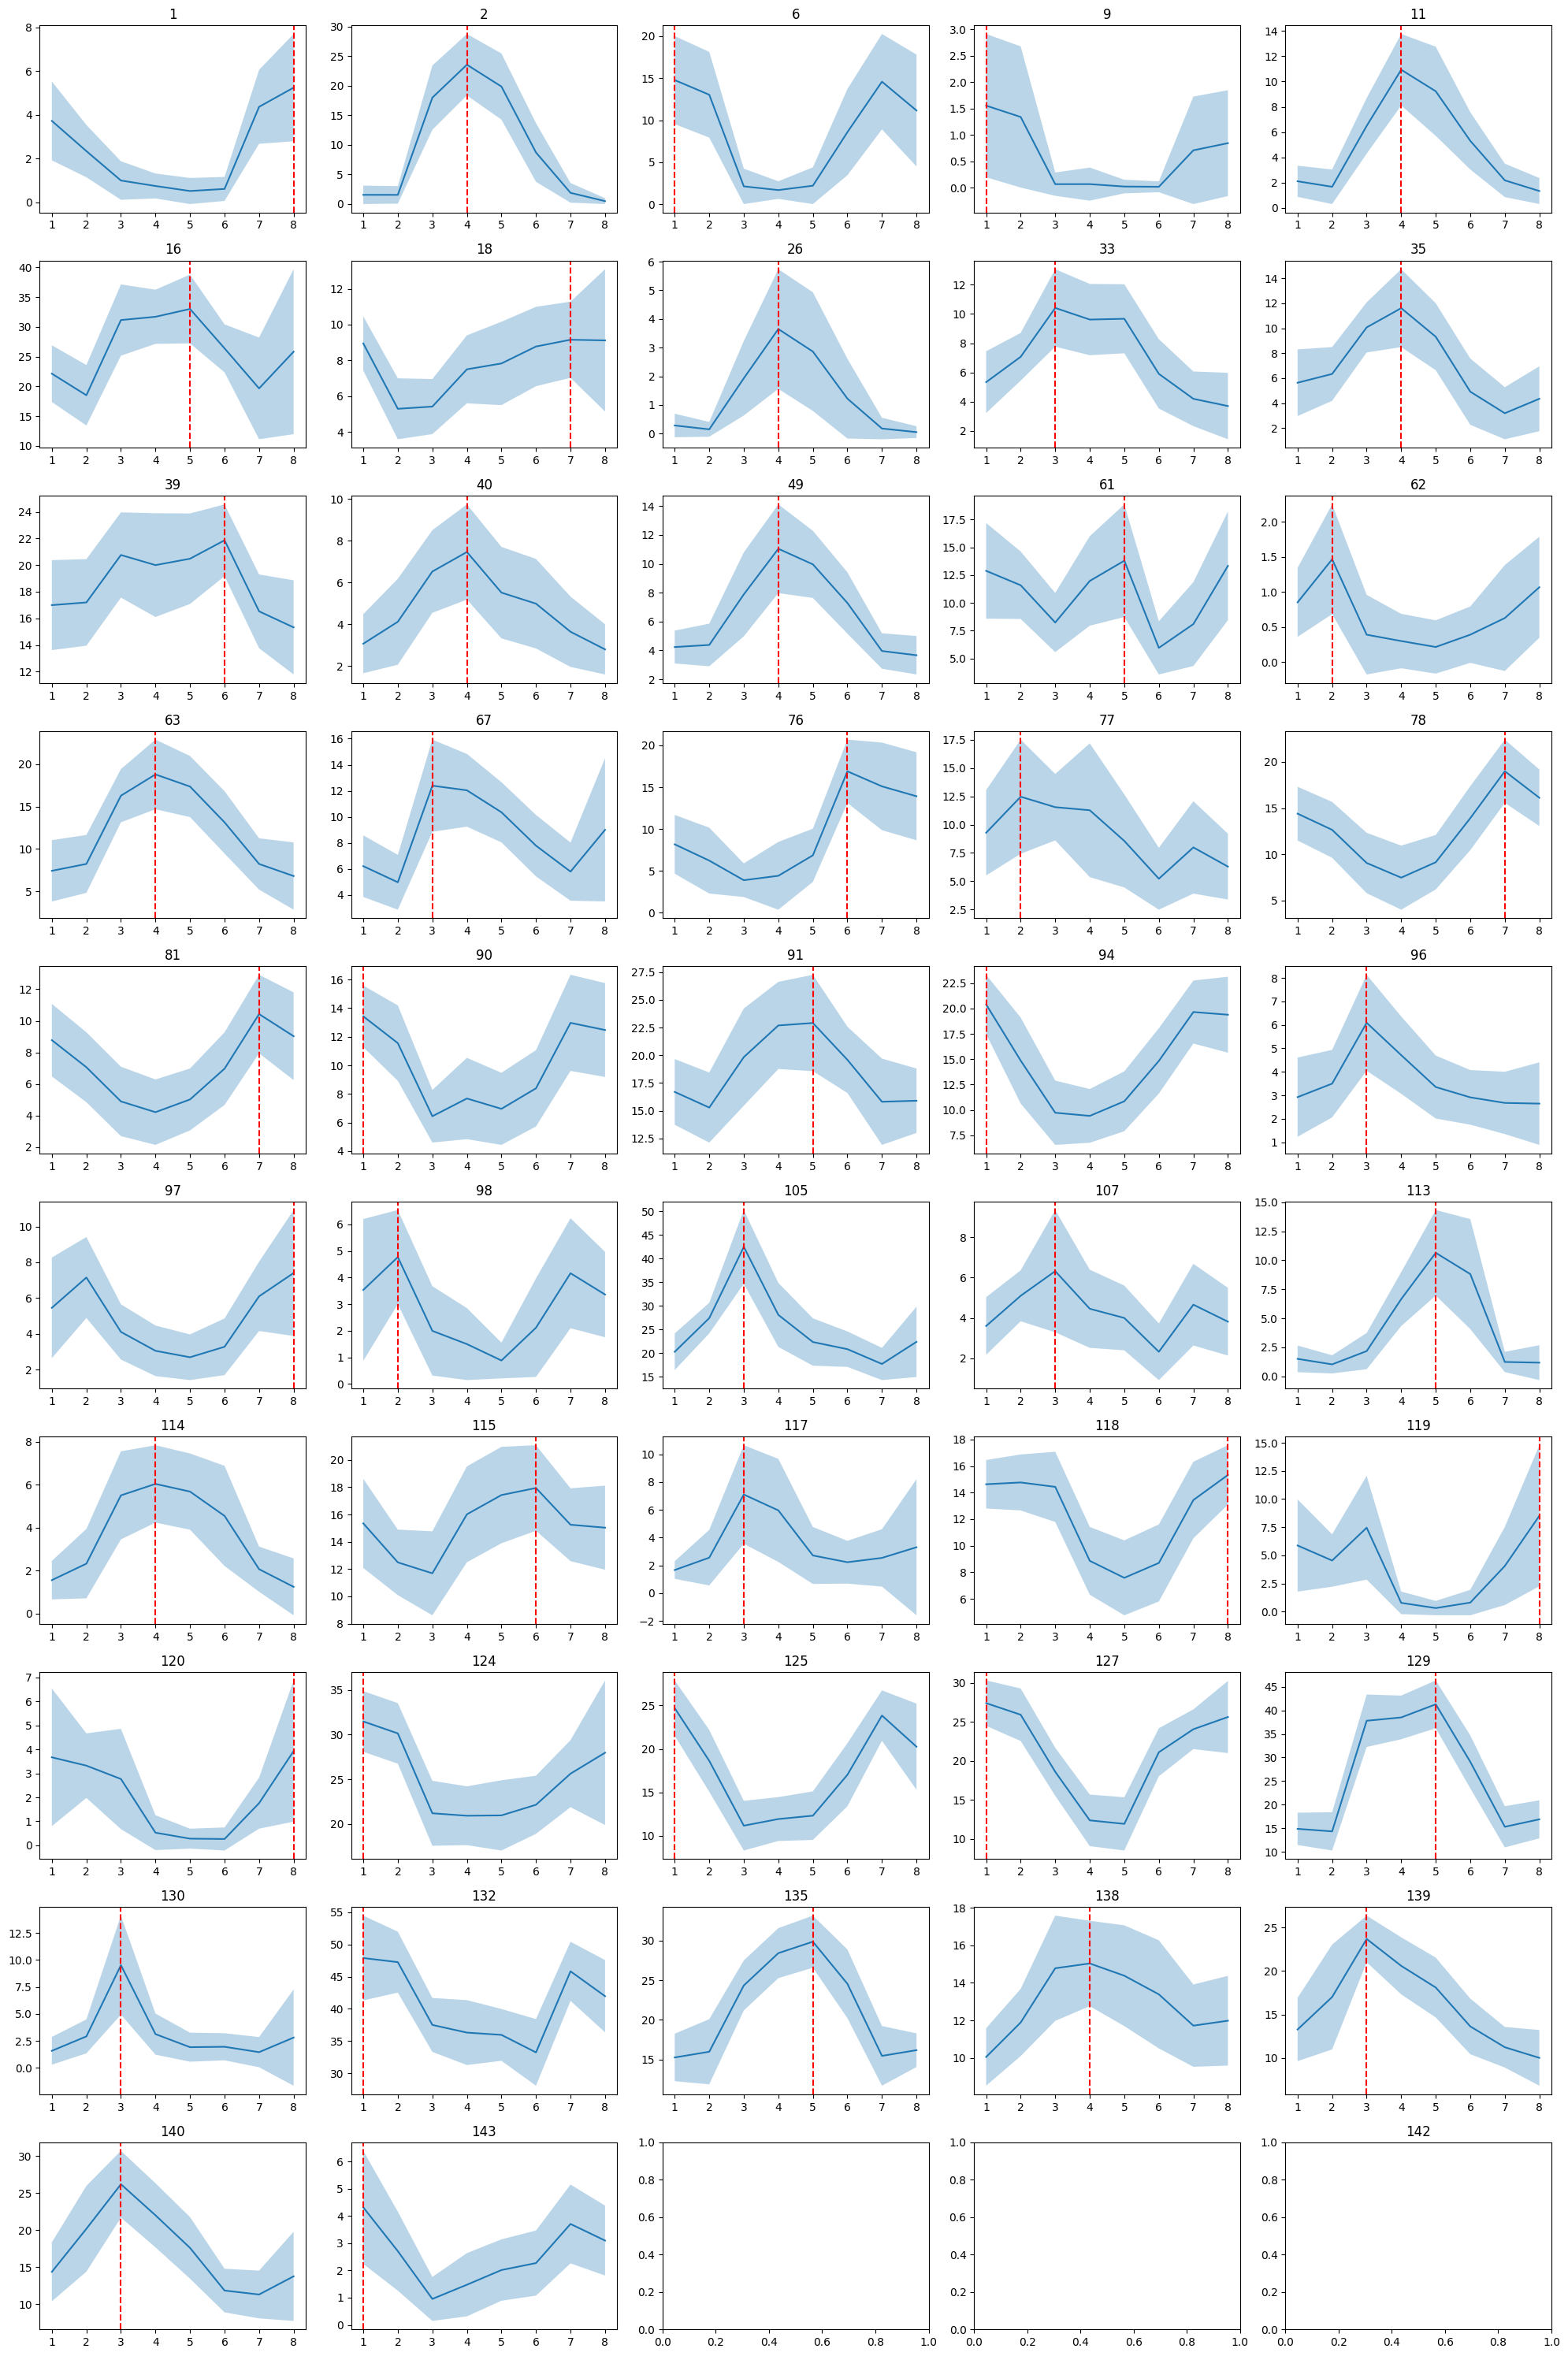

In [15]:
ncols=5
nrows = len(neru)//ncols + 1
erreur_standard = 0 #Better with 0

fig, ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(4*ncols,nrows*3))
c=0
for i in neru:#range(0,neurons.shape[O]):

  y=[]
  std_dev=[]

  for d in range(0,8):
    #neuron = stackdirection[1,d]
    y.append(stackdirection[d][i].mean())
    if(erreur_standard==1):
      std_dev.append(np.std(stackdirection[d][i])/len(stackdirection[d][i]))
    else:
      std_dev.append(np.std(stackdirection[d][i]))

  y = np.array(y)
  index_max = max(range(len(y)), key=y.__getitem__)

  plt.title(i)
  ax[c//ncols][c%ncols].plot(range(1,9),y)
  ax[c//ncols][c%ncols].set_title(i+1)
  ax[c//ncols][c%ncols].fill_between(range(1,9), y - std_dev, y + std_dev, alpha=0.3)
  ax[c//ncols][c%ncols].axvline(index_max+1, color='red', linestyle='--')

  c+=1
fig.tight_layout()


In [18]:
stackdirection[d][i]

array([0.93300989, 5.13555731, 3.65905718, 2.95909057, 3.19747613,
       0.94535829, 2.93305306, 5.75533434, 1.91844478, 3.09450622,
       1.75167139, 1.94385499, 3.8843751 , 3.31168473, 4.42554028,
       3.46867593, 3.31729972])

Maintenant on va s'intéresser à l'expression conjointe de 2 neurones.

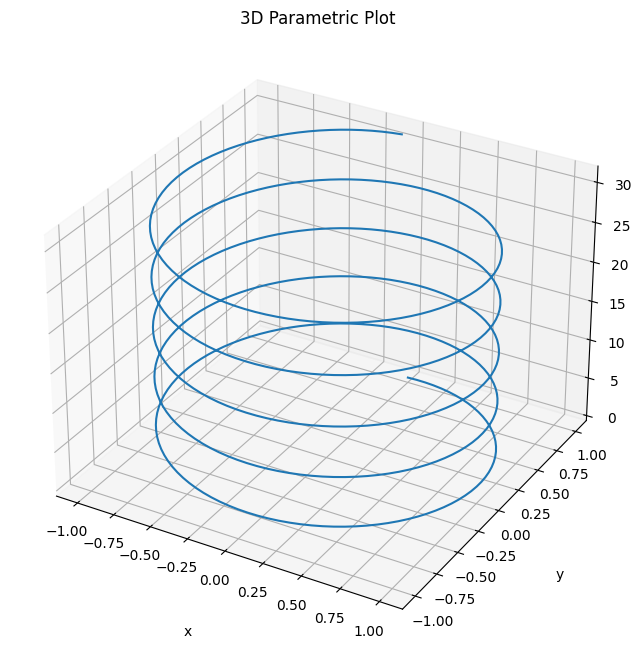

In [17]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()
t = np.arange(0, 10*np.pi, np.pi/50)
x = np.sin(t)
y = np.cos(t)

ax.plot3D(x, y, t)
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

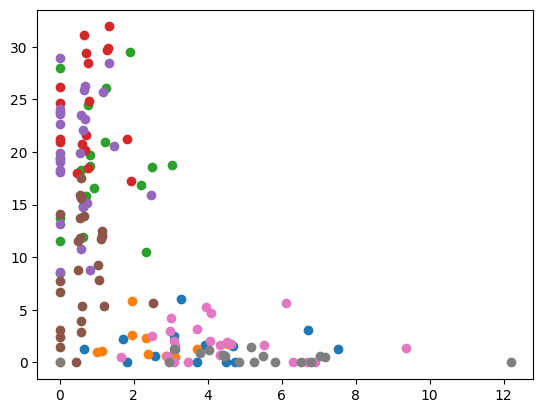

In [35]:
stackdirection[1][5]
for i in range(0,8):
  plt.plot(stackdirection[i][0],stackdirection[i][1],'o')